In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(["EIN", "NAME", "STATUS", "SPECIAL_CONSIDERATIONS"], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df[application_df.columns].nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
values_count = application_df['APPLICATION_TYPE'].value_counts()
# Determine which values to replace if counts are less than ...?
replace_application = list(values_count[values_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Look at CLASSIFICATION value counts for binning
clasification_count = application_df['CLASSIFICATION'].value_counts()
# Determine which values to replace if counts are less than ..?
replace_class = list(clasification_count[clasification_count < 1250].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [6]:
application_df['ASK_AMT'].value_counts()

5000       25398
15583          3
6725           3
63981          3
10478          3
           ...  
75598          1
22336          1
44863          1
5928           1
6948863        1
Name: ASK_AMT, Length: 8747, dtype: int64

<AxesSubplot:>

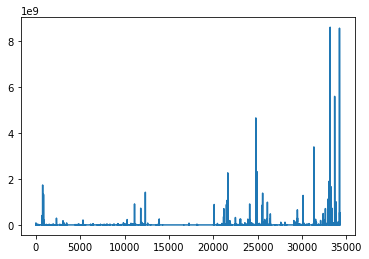

In [7]:
%matplotlib inline
application_df['ASK_AMT'].plot()

In [8]:
application_df.loc[(application_df['ASK_AMT'] <= 5000), 'ASK_AMT_cat'] = 'lower_equal_5000'
application_df.loc[(application_df['ASK_AMT'] > 5000) & (application_df['ASK_AMT'] < 30000), 'ASK_AMT_cat'] = 'other'
application_df.loc[(application_df['ASK_AMT'] >= 30000) & (application_df['ASK_AMT'] < 60000), 'ASK_AMT_cat'] = '30000_to_60000'
application_df.loc[(application_df['ASK_AMT'] >= 60000) & (application_df['ASK_AMT'] < 100000), 'ASK_AMT_cat'] = '60000_to_100000'
application_df.loc[(application_df['ASK_AMT'] >= 100000) & (application_df['ASK_AMT'] < 200000), 'ASK_AMT_cat'] = '100000_to_200000'
application_df.loc[(application_df['ASK_AMT'] >= 200000) & (application_df['ASK_AMT'] < 500000), 'ASK_AMT_cat'] = '200000_to_500000'
application_df.loc[(application_df['ASK_AMT'] >= 500000) & (application_df['ASK_AMT'] < 2000000), 'ASK_AMT_cat'] = '500000_to_2000000'
application_df.loc[(application_df['ASK_AMT'] >= 2000000), 'ASK_AMT_cat'] = 'more_than_2000000'

In [9]:
application_df['ASK_AMT_cat'].value_counts()

lower_equal_5000     25398
other                 1993
30000_to_60000        1351
200000_to_500000      1174
500000_to_2000000     1136
100000_to_200000      1131
more_than_2000000     1092
60000_to_100000       1024
Name: ASK_AMT_cat, dtype: int64

In [10]:
application_df.drop(["ASK_AMT"], axis=1, inplace=True)

In [11]:
# Generate our categorical variable lists
application_cat = ["APPLICATION_TYPE", "AFFILIATION", "USE_CASE", "ORGANIZATION","INCOME_AMT", "ASK_AMT_cat", "CLASSIFICATION"]

In [12]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ASK_AMT_cat_60000_to_100000,ASK_AMT_cat_lower_equal_5000,ASK_AMT_cat_more_than_2000000,ASK_AMT_cat_other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
merged_df = application_df.merge(encode_df, left_index=True, right_index=True)
merged_df = merged_df.drop(application_cat,1)
merged_df.head()

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ASK_AMT_cat_60000_to_100000,ASK_AMT_cat_lower_equal_5000,ASK_AMT_cat_more_than_2000000,ASK_AMT_cat_other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ASK_AMT_cat_60000_to_100000,ASK_AMT_cat_lower_equal_5000,ASK_AMT_cat_more_than_2000000,ASK_AMT_cat_other,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = merged_df["IS_SUCCESSFUL"].values
X = merged_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85)
## stratificacion -- buscar # crear un bin --- agregarle mas epocas a los mejores modelos

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 76
hidden_nodes_layer2 = 58

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 76)                3648      
_________________________________________________________________
dense_1 (Dense)              (None, 58)                4466      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 59        
Total params: 8,173
Trainable params: 8,173
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/AlphabetSoupCharity.{epoch:02d}.hdf5"
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [20]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 0s - loss: 0.7263 - accuracy: 0.5000
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
  5/804 [..............................] - ETA: 18s - loss: 0.6978 - accuracy: 0.5063
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
 10/804 [..............................] - ETA: 27s - loss: 0.6708 - accuracy: 0.6313
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
 15/804 [..............................] - ETA: 34s - loss: 0.6652 - accuracy: 0.6333
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
 25/804 [..............................] - ETA: 24s - loss: 0.6472 - accuracy: 0.6550
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
 30/804 [>.............................] - ETA: 22s - loss: 0.6345 - accuracy: 0.6667
Epoch 00001: saving model to checkpoints/AlphabetSoupChari


Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.5930 - accuracy: 0.7106
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.5919 - accuracy: 0.7112
Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5

Epoch 00001: saving model to checkpoints/AlphabetSoupCharity.01.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.5


Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.5774 - accuracy: 0.7196
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 0.5689 - accuracy: 0.7292
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 0.5605 - accuracy: 0.7334
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.5638 - accuracy: 0.7316
Epoch 00002: saving model to chec


Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5690 - accuracy: 0.7243
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5692 - accuracy: 0.7238
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5

Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5703 - accuracy: 0.7223
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5701 - accuracy: 0.7224
Epoch 00002: saving model to checkpoints/AlphabetSoupCharity.02.hdf5
516/804 [==================>......

 97/804 [==>...........................] - ETA: 1s - loss: 0.5722 - accuracy: 0.7165
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
114/804 [===>..........................] - ETA: 1s - loss: 0.5683 - accuracy: 0.7204
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
132/804 [===>..........................] - ETA: 1s - loss: 0.5716 - accuracy: 0.7178
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/Alphab


Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5641 - accuracy: 0.7234
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5631 - accuracy: 0.7243
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5640 - accuracy: 0.7239
Epoch 00003: saving model to checkpoints/AlphabetSoupCharity.03.hdf5

Epoch 00003: saving model to checkpoints/Alphab

178/804 [=====>........................] - ETA: 2s - loss: 0.5551 - accuracy: 0.7237
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
201/804 [======>.......................] - ETA: 1s - loss: 0.5552 - accuracy: 0.7247
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5536 - accuracy: 0.7265
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/Alphab


Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5593 - accuracy: 0.7243
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5594 - accuracy: 0.7236
Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5

Epoch 00004: saving model to checkpoints/AlphabetSoupCharity.04.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5595 - accuracy: 0.7240
Epoch 00004: saving model to checkpoints/Alphab

231/804 [=======>......................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7330
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7324
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.5488 - accuracy: 0.7324
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
279/804 [=========>....................] - ETA: 

659/804 [=======================>......] - ETA: 0s - loss: 0.5558 - accuracy: 0.7252
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5564 - accuracy: 0.7243
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5562 - accuracy: 0.7249
Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5

Epoch 00005: saving model to checkpoints/AlphabetSoupCharity.05.hdf5
709/804 [=========================>....] - ETA: 

294/804 [=========>....................] - ETA: 1s - loss: 0.5568 - accuracy: 0.7281
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5555 - accuracy: 0.7280
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5556 - accuracy: 0.7281
Epoch 00006: saving model to checkpoints/Alphab


Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5564 - accuracy: 0.7251
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7257
Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5

Epoch 00006: saving model to checkpoints/AlphabetSoupCharity.06.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7266
Epoch 00006: saving model to checkpoints/Alphab

366/804 [============>.................] - ETA: 1s - loss: 0.5524 - accuracy: 0.7296
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5533 - accuracy: 0.7286
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
401/804 [=============>................] - ETA: 1s - loss: 0.5544 - accuracy: 0.7269
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/Alphab

768/804 [===========================>..] - ETA: 0s - loss: 0.5525 - accuracy: 0.7279
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5521 - accuracy: 0.7284
Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5

Epoch 00007: saving model to checkpoints/AlphabetSoupCharity.07.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5531 - accuracy: 0.7278
Epoch 8/100
  1/804 [..............................] - ETA: 0s - loss: 0.5169 - accuracy: 0.8438
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: sav

332/804 [===========>..................] - ETA: 3s - loss: 0.5520 - accuracy: 0.7270
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5510 - accuracy: 0.7276
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7280
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
362/804 [============>.................] - ETA: 2s - loss: 0.5506 - accuracy: 0.7280
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.5511 - accuracy: 0.7271
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving


Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5528 - accuracy: 0.7268
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5523 - accuracy: 0.7272
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5528 - accuracy: 0.7268
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5521 - accuracy: 0.7274
Epoch 00008: saving model to checkpoints/AlphabetSoupCharity.08.hdf5

Epoch 00008: saving model to chec

358/804 [============>.................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7326
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5468 - accuracy: 0.7329
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5482 - accuracy: 0.7323
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/Alphab

763/804 [===========================>..] - ETA: 0s - loss: 0.5505 - accuracy: 0.7296
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5502 - accuracy: 0.7298
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5505 - accuracy: 0.7294
Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5

Epoch 00009: saving model to checkpoints/AlphabetSoupCharity.09.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5507 - accuracy: 0.7293
Epoch 10/100
  1/804 [..............................] - ETA: 0s - loss: 0.6058 - accuracy: 0.6875
E


Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5507 - accuracy: 0.7271
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5513 - accuracy: 0.7267
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5512 - accuracy: 0.7270
Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5

Epoch 00010: saving model to checkpoints/Alphab


Epoch 00010: saving model to checkpoints/AlphabetSoupCharity.10.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5505 - accuracy: 0.7283
Epoch 11/100
  1/804 [..............................] - ETA: 0s - loss: 0.6285 - accuracy: 0.6875
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5592 - accuracy: 0.7188
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.5433 - accuracy: 0.7406
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.5795 - accuracy: 0.7054
E


Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.5508 - accuracy: 0.7304
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
400/804 [=============>................] - ETA: 3s - loss: 0.5506 - accuracy: 0.7309
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5

Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 0.5491 - accuracy: 0.7327
Epoch 00011: saving model to checkpoints/AlphabetSoupCharity.11.hdf5
425/804 [==============>...............] - ETA: 

804/804 [==============================] - 5s 6ms/step - loss: 0.5491 - accuracy: 0.7308
Epoch 12/100

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
  1/804 [..............................] - ETA: 0s - loss: 0.4943 - accuracy: 0.8125
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5589 - accuracy: 0.7260
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7464
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.5419 - accuracy: 0.7399
E

418/804 [==============>...............] - ETA: 1s - loss: 0.5484 - accuracy: 0.7267
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5482 - accuracy: 0.7279
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5481 - accuracy: 0.7284
Epoch 00012: saving model to checkpoints/AlphabetSoupCharity.12.hdf5

Epoch 00012: saving model to checkpoints/Alphab


Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.5542 - accuracy: 0.7270
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 67/804 [=>............................] - ETA: 2s - loss: 0.5514 - accuracy: 0.7304
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5554 - accuracy: 0.7256
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5553 - accuracy: 0.7249
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to chec

451/804 [===============>..............] - ETA: 1s - loss: 0.5512 - accuracy: 0.7296
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5516 - accuracy: 0.7296
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5507 - accuracy: 0.7300
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.5502 - accuracy: 0.7302
Epoch 00013: saving model to checkpoints/AlphabetSoupCharity.13.hdf5

Epoch 00013: saving model to chec

 43/804 [>.............................] - ETA: 3s - loss: 0.5330 - accuracy: 0.7435
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
 55/804 [=>............................] - ETA: 3s - loss: 0.5363 - accuracy: 0.7347
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7344
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7256
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to chec

443/804 [===============>..............] - ETA: 1s - loss: 0.5482 - accuracy: 0.7298
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5477 - accuracy: 0.7305
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5480 - accuracy: 0.7297
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5476 - accuracy: 0.7298
Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5

Epoch 00014: saving model to checkpoints/AlphabetSoupCharity.14.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5476 - accuracy: 0.7301
Epoch 00014: saving

 29/804 [>.............................] - ETA: 2s - loss: 0.5455 - accuracy: 0.7457
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7366
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7387
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/Alphab


Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 0.5425 - accuracy: 0.7344
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5415 - accuracy: 0.7357
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5404 - accuracy: 0.7367
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5406 - accuracy: 0.7369
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to chec

794/804 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7334
Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5

Epoch 00015: saving model to checkpoints/AlphabetSoupCharity.15.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.5466 - accuracy: 0.7332
Epoch 16/100
  1/804 [..............................] - ETA: 0s - loss: 0.5672 - accuracy: 0.7500
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5736 - accuracy: 0.7167
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5566 - accuracy: 0.7312
E

358/804 [============>.................] - ETA: 2s - loss: 0.5463 - accuracy: 0.7321
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7323
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7337
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7334
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7330
Epoch 00016: saving

750/804 [==========================>...] - ETA: 0s - loss: 0.5461 - accuracy: 0.7321
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5467 - accuracy: 0.7314
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.5466 - accuracy: 0.7312
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5465 - accuracy: 0.7314
Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5

Epoch 00016: saving model to checkpoints/AlphabetSoupCharity.16.hdf5
796/804 [=========================


Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7339
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7343
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5430 - accuracy: 0.7343
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/Alphab

772/804 [===========================>..] - ETA: 0s - loss: 0.5452 - accuracy: 0.7309
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7304
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5

Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7312
Epoch 00017: saving model to checkpoints/AlphabetSoupCharity.17.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5450 - accuracy: 0.7312
Epoch 18/100
  1/804 [..............................] - ETA: 0s - loss: 0.4356 - accuracy: 0.8438
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
  

357/804 [============>.................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7380
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7389
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7382
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7382
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to chec

750/804 [==========================>...] - ETA: 0s - loss: 0.5442 - accuracy: 0.7341
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5436 - accuracy: 0.7340
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7339
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5443 - accuracy: 0.7332
Epoch 00018: saving model to checkpoints/AlphabetSoupCharity.18.hdf5

Epoch 00018: saving model to chec

333/804 [===========>..................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7320
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5458 - accuracy: 0.7315
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5467 - accuracy: 0.7306
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/Alphab


Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5445 - accuracy: 0.7313
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5441 - accuracy: 0.7316
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.7318
Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/AlphabetSoupCharity.19.hdf5

Epoch 00019: saving model to checkpoints/Alphab


Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7325
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5442 - accuracy: 0.7315
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5450 - accuracy: 0.7315
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7321
Epoch 00020: saving model to chec

759/804 [===========================>..] - ETA: 0s - loss: 0.5440 - accuracy: 0.7316
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5439 - accuracy: 0.7315
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5

Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5442 - accuracy: 0.7317
Epoch 00020: saving model to checkpoints/AlphabetSoupCharity.20.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5440 - accuracy: 0.7320
Epoch 21/100
  1/804 [.......


Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7330
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5413 - accuracy: 0.7338
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7326
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5420 - accuracy: 0.7328
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
409/804 [==============>..........


Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5434 - accuracy: 0.7328
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5445 - accuracy: 0.7319
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5441 - accuracy: 0.7322
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5

Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5438 - accuracy: 0.7325
Epoch 00021: saving model to checkpoints/AlphabetSoupCharity.21.hdf5
804/804 [=========================

331/804 [===========>..................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7294
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.5474 - accuracy: 0.7295
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7302
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7306
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
376/804 [=============>...........

721/804 [=========================>....] - ETA: 0s - loss: 0.5430 - accuracy: 0.7324
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5427 - accuracy: 0.7323
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.7329
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5422 - accuracy: 0.7331
Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5

Epoch 00022: saving model to checkpoints/AlphabetSoupCharity.22.hdf5
766/804 [=========================

309/804 [==========>...................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7360
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7358
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7354
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5409 - accuracy: 0.7357
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.5405 - accuracy: 0.7363
Epoch 00023: saving

707/804 [=========================>....] - ETA: 0s - loss: 0.5429 - accuracy: 0.7329
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7334
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5423 - accuracy: 0.7336
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5422 - accuracy: 0.7339
Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5

Epoch 00023: saving model to checkpoints/AlphabetSoupCharity.23.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7335
Epoch 00023: saving

308/804 [==========>...................] - ETA: 1s - loss: 0.5491 - accuracy: 0.7249
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7262
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
348/804 [===========>..................] - ETA: 1s - loss: 0.5465 - accuracy: 0.7278
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/Alphab


Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5432 - accuracy: 0.7335
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5430 - accuracy: 0.7334
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5431 - accuracy: 0.7330
Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/AlphabetSoupCharity.24.hdf5

Epoch 00024: saving model to checkpoints/Alphab

379/804 [=============>................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7305
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7300
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5440 - accuracy: 0.7299
Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/AlphabetSoupCharity.25.hdf5

Epoch 00025: saving model to checkpoints/Alphab

Epoch 26/100
  1/804 [..............................] - ETA: 0s - loss: 0.4540 - accuracy: 0.8125
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5141 - accuracy: 0.7437
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7359
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to check


Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5442 - accuracy: 0.7331
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7332
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5430 - accuracy: 0.7346
Epoch 00026: saving model to checkpoints/AlphabetSoupCharity.26.hdf5

Epoch 00026: saving model to checkpoints/Alphab


Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.5462 - accuracy: 0.7311
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 0.5476 - accuracy: 0.7305
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7327
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7341
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to chec


Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7340
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5442 - accuracy: 0.7337
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5431 - accuracy: 0.7347
Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/AlphabetSoupCharity.27.hdf5

Epoch 00027: saving model to checkpoints/Alphab

122/804 [===>..........................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7387
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7401
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7396
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7370
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7395
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving

532/804 [==================>...........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7321
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7321
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.5426 - accuracy: 0.7322
Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5

Epoch 00028: saving model to checkpoints/AlphabetSoupCharity.28.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7317
Epoch 00028: saving model to chec

148/804 [====>.........................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7310
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7312
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
183/804 [=====>........................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7329
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
198/804 [======>.......................] - ETA: 


Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7322
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5439 - accuracy: 0.7318
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5437 - accuracy: 0.7325
Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5

Epoch 00029: saving model to checkpoints/AlphabetSoupCharity.29.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5430 - accuracy: 0.7335
Epoch 00029: saving model to chec

164/804 [=====>........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7397
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7394
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7389
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7371
Epoch 00030: saving model to chec

569/804 [====================>.........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7349
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7354
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5408 - accuracy: 0.7353
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7360
Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to checkpoints/AlphabetSoupCharity.30.hdf5

Epoch 00030: saving model to chec


Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7354
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
190/804 [======>.......................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7336
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7337
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7334
Epoch 00031: saving model to chec

559/804 [===================>..........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7314
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7314
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5421 - accuracy: 0.7314
Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5

Epoch 00031: saving model to checkpoints/AlphabetSoupCharity.31.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.5427 - accuracy: 0.7308
Epoch 00031: saving model to chec


Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.5463 - accuracy: 0.7250
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
161/804 [=====>........................] - ETA: 4s - loss: 0.5439 - accuracy: 0.7277
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.5434 - accuracy: 0.7283
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
181/804 [=====>........................] - ETA: 4s - loss: 0.5423 - accuracy: 0.7288
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.5422 - accuracy: 0.7286
Epoch 00032: saving

531/804 [==================>...........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7348
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5377 - accuracy: 0.7342
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5379 - accuracy: 0.7342
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5371 - accuracy: 0.7350
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5374 - accuracy: 0.7348
Epoch 00032: saving model to checkpoints/AlphabetSoupCharity.32.hdf5

Epoch 00032: saving

 87/804 [==>...........................] - ETA: 5s - loss: 0.5298 - accuracy: 0.7381
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
 97/804 [==>...........................] - ETA: 5s - loss: 0.5279 - accuracy: 0.7400
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
107/804 [==>...........................] - ETA: 5s - loss: 0.5293 - accuracy: 0.7386
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
117/804 [===>..........................] - ETA: 5s - loss: 0.5311 - accuracy: 0.7364
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.5374 - accuracy: 0.7330
Epoch 00033: saving


Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.5391 - accuracy: 0.7333
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.5393 - accuracy: 0.7328
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.5390 - accuracy: 0.7331
Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5

Epoch 00033: saving model to checkpoints/AlphabetSoupCharity.33.hdf5
517/804 [==================>...........] - ETA: 

  7/804 [..............................] - ETA: 5s - loss: 0.5364 - accuracy: 0.7277
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
 13/804 [..............................] - ETA: 7s - loss: 0.5113 - accuracy: 0.7428
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
 21/804 [..............................] - ETA: 6s - loss: 0.5183 - accuracy: 0.7440
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
 27/804 [>.............................] - ETA: 6s - loss: 0.5416 - accuracy: 0.7257
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
 33/804 [>.............................] - ETA: 6s - loss: 0.5376 - accuracy: 0.7301
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
 45/804 [>..........

388/804 [=============>................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7384
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.5338 - accuracy: 0.7393
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5341 - accuracy: 0.7393
Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/AlphabetSoupCharity.34.hdf5

Epoch 00034: saving model to checkpoints/Alphab

 19/804 [..............................] - ETA: 2s - loss: 0.5464 - accuracy: 0.7401
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5498 - accuracy: 0.7340
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7383
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/Alphab


Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
479/804 [================>.............] - ETA: 0s - loss: 0.5402 - accuracy: 0.7338
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
499/804 [=================>............] - ETA: 0s - loss: 0.5399 - accuracy: 0.7341
Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5

Epoch 00035: saving model to checkpoints/AlphabetSoupCharity.35.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7345
Epoch 00035: saving model to checkpoints/Alphab

100/804 [==>...........................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7306
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7330
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7368
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/Alphab


Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7342
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7340
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7329
Epoch 00036: saving model to checkpoints/AlphabetSoupCharity.36.hdf5

Epoch 00036: saving model to checkpoints/Alphab

151/804 [====>.........................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7378
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5323 - accuracy: 0.7378
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
171/804 [=====>........................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7392
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7382
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
196/804 [======>..................


Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.5355 - accuracy: 0.7373
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7372
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.5371 - accuracy: 0.7365
Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5

Epoch 00037: saving model to checkpoints/AlphabetSoupCharity.37.hdf5
592/804 [=====================>........] - ETA: 


Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7363
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7394
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
227/804 [=======>......................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7411
Epoch 00038: saving model to checkpoints/Alphab


Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7353
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7356
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7359
Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5

Epoch 00038: saving model to checkpoints/AlphabetSoupCharity.38.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5388 - accuracy: 0.7358
Epoch 00038: saving model to chec


Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7313
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7314
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7318
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.5419 - accuracy: 0.7342
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
245/804 [========>................

579/804 [====================>.........] - ETA: 1s - loss: 0.5380 - accuracy: 0.7372
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7369
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5392 - accuracy: 0.7362
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7365
Epoch 00039: saving model to checkpoints/AlphabetSoupCharity.39.hdf5

Epoch 00039: saving model to chec

170/804 [=====>........................] - ETA: 3s - loss: 0.5405 - accuracy: 0.7316
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7331
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5398 - accuracy: 0.7326
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/Alphab


Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7341
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7342
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5403 - accuracy: 0.7343
Epoch 00040: saving model to checkpoints/AlphabetSoupCharity.40.hdf5

Epoch 00040: saving model to checkpoints/Alphab

195/804 [======>.......................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7365
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7383
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7381
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7367
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
244/804 [========>................

610/804 [=====================>........] - ETA: 0s - loss: 0.5389 - accuracy: 0.7335
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7341
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7352
Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5

Epoch 00041: saving model to checkpoints/AlphabetSoupCharity.41.hdf5
661/804 [=======================>......] - ETA: 

224/804 [=======>......................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7369
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7367
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7390
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7382
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7370
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving

616/804 [=====================>........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7362
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5396 - accuracy: 0.7363
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7361
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5390 - accuracy: 0.7368
Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to checkpoints/AlphabetSoupCharity.42.hdf5

Epoch 00042: saving model to chec

212/804 [======>.......................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7238
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7229
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7259
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7265
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to chec


Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5391 - accuracy: 0.7334
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7337
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5394 - accuracy: 0.7336
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5384 - accuracy: 0.7345
Epoch 00043: saving model to checkpoints/AlphabetSoupCharity.43.hdf5

Epoch 00043: saving model to chec


Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5397 - accuracy: 0.7352
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7338
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7349
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7342
Epoch 00044: saving model to chec

611/804 [=====================>........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7365
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5376 - accuracy: 0.7369
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.5382 - accuracy: 0.7367
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5374 - accuracy: 0.7371
Epoch 00044: saving model to checkpoints/AlphabetSoupCharity.44.hdf5

Epoch 00044: saving model to chec


Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.5306 - accuracy: 0.7423
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.5327 - accuracy: 0.7403
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7390
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7383
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to chec

526/804 [==================>...........] - ETA: 1s - loss: 0.5347 - accuracy: 0.7381
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5348 - accuracy: 0.7385
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.5354 - accuracy: 0.7381
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7381
Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5

Epoch 00045: saving model to checkpoints/AlphabetSoupCharity.45.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7384
Epoch 00045: saving

100/804 [==>...........................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7303
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.5466 - accuracy: 0.7277
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
130/804 [===>..........................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7281
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
150/804 [====>.........................] - ETA: 

520/804 [==================>...........] - ETA: 1s - loss: 0.5389 - accuracy: 0.7361
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5381 - accuracy: 0.7370
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7375
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7384
Epoch 00046: saving model to checkpoints/AlphabetSoupCharity.46.hdf5

Epoch 00046: saving model to chec


Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
131/804 [===>..........................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7424
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
151/804 [====>.........................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7409
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
171/804 [=====>........................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7425
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/Alphab

556/804 [===================>..........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7381
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5354 - accuracy: 0.7383
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5356 - accuracy: 0.7381
Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5

Epoch 00047: saving model to checkpoints/AlphabetSoupCharity.47.hdf5
607/804 [=====================>........] - ETA: 


Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
187/804 [=====>........................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7428
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 0.5268 - accuracy: 0.7454
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7434
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/Alphab


Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7354
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7354
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5379 - accuracy: 0.7354
Epoch 00048: saving model to checkpoints/AlphabetSoupCharity.48.hdf5

Epoch 00048: saving model to checkpoints/Alphab

228/804 [=======>......................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7436
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7436
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7444
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/Alphab

668/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7379
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5366 - accuracy: 0.7385
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5372 - accuracy: 0.7383
Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5

Epoch 00049: saving model to checkpoints/AlphabetSoupCharity.49.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7379
Epoch 00049: saving model to chec


Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
294/804 [=========>....................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7462
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
310/804 [==========>...................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7461
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5285 - accuracy: 0.7457
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/Alphab


Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7369
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.7364
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7374
Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/AlphabetSoupCharity.50.hdf5

Epoch 00050: saving model to checkpoints/Alphab

337/804 [===========>..................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7389
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7379
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7367
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/Alphab


Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5358 - accuracy: 0.7358
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7358
Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5

Epoch 00051: saving model to checkpoints/AlphabetSoupCharity.51.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5360 - accuracy: 0.7360
Epoch 52/100

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
  1/804 [..............................] - ETA: 0s - loss: 0.4742 - accuracy: 0.7812
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: sa


Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7396
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5335 - accuracy: 0.7396
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7391
Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/AlphabetSoupCharity.52.hdf5

Epoch 00052: saving model to checkpoints/Alphab

 17/804 [..............................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7335
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7154
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7226
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/Alphab

454/804 [===============>..............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7328
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7339
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5377 - accuracy: 0.7333
Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5

Epoch 00053: saving model to checkpoints/AlphabetSoupCharity.53.hdf5
506/804 [=================>............] - ETA: 


Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7412
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7477
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7477
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/Alphab

503/804 [=================>............] - ETA: 0s - loss: 0.5303 - accuracy: 0.7409
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5296 - accuracy: 0.7416
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5287 - accuracy: 0.7425
Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5

Epoch 00054: saving model to checkpoints/AlphabetSoupCharity.54.hdf5
553/804 [===================>..........] - ETA: 

109/804 [===>..........................] - ETA: 3s - loss: 0.5209 - accuracy: 0.7477
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.5199 - accuracy: 0.7495
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
136/804 [====>.........................] - ETA: 3s - loss: 0.5228 - accuracy: 0.7470
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 0.5261 - accuracy: 0.7444
Epoch 00055: saving model to chec


Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7371
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7367
Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5

Epoch 00055: saving model to checkpoints/AlphabetSoupCharity.55.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7370
Epoch 00055: saving model to checkpoints/Alphab

145/804 [====>.........................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7291
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7312
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7351
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/Alphab


Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7414
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7416
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7413
Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5

Epoch 00056: saving model to checkpoints/AlphabetSoupCharity.56.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7412
Epoch 00056: saving model to chec

156/804 [====>.........................] - ETA: 5s - loss: 0.5388 - accuracy: 0.7358
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
169/804 [=====>........................] - ETA: 5s - loss: 0.5354 - accuracy: 0.7382
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
176/804 [=====>........................] - ETA: 5s - loss: 0.5361 - accuracy: 0.7369
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
186/804 [=====>........................] - ETA: 5s - loss: 0.5358 - accuracy: 0.7367
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to chec


Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.5338 - accuracy: 0.7385
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5336 - accuracy: 0.7389
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.5346 - accuracy: 0.7380
Epoch 00057: saving model to checkpoints/AlphabetSoupCharity.57.hdf5

Epoch 00057: saving model to checkpoints/Alphab

204/804 [======>.......................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7353
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
222/804 [=======>......................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7383
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5367 - accuracy: 0.7363
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
255/804 [========>.....................] - ETA: 

628/804 [======================>.......] - ETA: 0s - loss: 0.5328 - accuracy: 0.7395
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7393
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5333 - accuracy: 0.7397
Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/AlphabetSoupCharity.58.hdf5

Epoch 00058: saving model to checkpoints/Alphab


Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7364
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7356
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7370
Epoch 00059: saving model to checkpoints/Alphab


Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7388
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5344 - accuracy: 0.7384
Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5

Epoch 00059: saving model to checkpoints/AlphabetSoupCharity.59.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5

318/804 [==========>...................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7418
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7421
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7423
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/Alphab


Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7386
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7389
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7395
Epoch 00060: saving model to checkpoints/AlphabetSoupCharity.60.hdf5

Epoch 00060: saving model to checkpoints/Alphab


Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7412
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7407
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7393
Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/AlphabetSoupCharity.61.hdf5

Epoch 00061: saving model to checkpoints/Alphab

Epoch 62/100

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
  1/804 [..............................] - ETA: 0s - loss: 0.4714 - accuracy: 0.7500
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5678 - accuracy: 0.7171
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5605 - accuracy: 0.7179
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to check

432/804 [===============>..............] - ETA: 1s - loss: 0.5325 - accuracy: 0.7392
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.5329 - accuracy: 0.7384
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5315 - accuracy: 0.7399
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7397
Epoch 00062: saving model to checkpoints/AlphabetSoupCharity.62.hdf5

Epoch 00062: saving model to chec

 52/804 [>.............................] - ETA: 2s - loss: 0.5404 - accuracy: 0.7290
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7252
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
 86/804 [==>...........................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7224
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
101/804 [==>...........................] - ETA: 2s - loss: 0.5505 - accuracy: 0.7246
Epoch 00063: saving model to chec


Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
497/804 [=================>............] - ETA: 0s - loss: 0.5380 - accuracy: 0.7362
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
513/804 [==================>...........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7356
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7360
Epoch 00063: saving model to checkpoints/AlphabetSoupCharity.63.hdf5

Epoch 00063: saving model to checkpoints/Alphab

103/804 [==>...........................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7461
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5285 - accuracy: 0.7450
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5288 - accuracy: 0.7442
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7421
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to chec

513/804 [==================>...........] - ETA: 1s - loss: 0.5323 - accuracy: 0.7367
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.5333 - accuracy: 0.7356
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.5335 - accuracy: 0.7354
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5332 - accuracy: 0.7351
Epoch 00064: saving model to checkpoints/AlphabetSoupCharity.64.hdf5

Epoch 00064: saving model to chec


Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7395
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7399
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
174/804 [=====>........................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7392
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/Alphab


Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7383
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7382
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7385
Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/AlphabetSoupCharity.65.hdf5

Epoch 00065: saving model to checkpoints/Alphab


Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7399
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7389
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7397
Epoch 00066: saving model to checkpoints/Alphab


Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5309 - accuracy: 0.7380
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5320 - accuracy: 0.7375
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5326 - accuracy: 0.7369
Epoch 00066: saving model to checkpoints/AlphabetSoupCharity.66.hdf5

Epoch 00066: saving model to checkpoints/Alphab


Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7402
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7399
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7415
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/Alphab


Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5340 - accuracy: 0.7357
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7364
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7361
Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/AlphabetSoupCharity.67.hdf5

Epoch 00067: saving model to checkpoints/Alphab

292/804 [=========>....................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7452
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7452
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7422
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/Alphab


Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.5326 - accuracy: 0.7397
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5330 - accuracy: 0.7394
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7393
Epoch 00068: saving model to checkpoints/AlphabetSoupCharity.68.hdf5

Epoch 00068: saving model to checkpoints/Alphab

345/804 [===========>..................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7348
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7355
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7362
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7357
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to chec


Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7378
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7371
Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5

Epoch 00069: saving model to checkpoints/AlphabetSoupCharity.69.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5324 - accuracy: 0.7376
Epoch 70/100
  1/804 [..............................] - ETA: 0s - loss: 0.7290 - accuracy: 0.5625
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: sa

390/804 [=============>................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7407
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5305 - accuracy: 0.7406
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5299 - accuracy: 0.7409
Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5

Epoch 00070: saving model to checkpoints/AlphabetSoupCharity.70.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5288 - accuracy: 0.7418
Epoch 00070: saving model to chec

  1/804 [..............................] - ETA: 0s - loss: 0.3768 - accuracy: 0.9062
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5232 - accuracy: 0.7375
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7420
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
 50/804 [>.............................] - ETA: 

434/804 [===============>..............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7358
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7351
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5324 - accuracy: 0.7366
Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/AlphabetSoupCharity.71.hdf5

Epoch 00071: saving model to checkpoints/Alphab

 51/804 [>.............................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7457
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.5301 - accuracy: 0.7390
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7311
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/Alphab

481/804 [================>.............] - ETA: 1s - loss: 0.5329 - accuracy: 0.7349
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5322 - accuracy: 0.7355
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5332 - accuracy: 0.7345
Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5

Epoch 00072: saving model to checkpoints/AlphabetSoupCharity.72.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7343
Epoch 00072: saving model to chec


Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7334
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
127/804 [===>..........................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7362
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.5258 - accuracy: 0.7382
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/Alphab

537/804 [===================>..........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7388
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5304 - accuracy: 0.7386
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7378
Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/AlphabetSoupCharity.73.hdf5

Epoch 00073: saving model to checkpoints/Alphab

156/804 [====>.........................] - ETA: 2s - loss: 0.5248 - accuracy: 0.7386
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5282 - accuracy: 0.7368
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7369
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
203/804 [======>.......................] - ETA: 

588/804 [====================>.........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7377
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7380
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5323 - accuracy: 0.7380
Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/AlphabetSoupCharity.74.hdf5

Epoch 00074: saving model to checkpoints/Alphab


Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
226/804 [=======>......................] - ETA: 1s - loss: 0.5225 - accuracy: 0.7510
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5237 - accuracy: 0.7499
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5235 - accuracy: 0.7498
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.5235 - accuracy: 0.7493
Epoch 00075: saving model to chec

649/804 [=======================>......] - ETA: 0s - loss: 0.5307 - accuracy: 0.7422
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5310 - accuracy: 0.7416
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5317 - accuracy: 0.7409
Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/AlphabetSoupCharity.75.hdf5

Epoch 00075: saving model to checkpoints/Alphab


Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7401
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7399
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7384
Epoch 00076: saving model to checkpoints/Alphab

700/804 [=========================>....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7371
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5327 - accuracy: 0.7376
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5324 - accuracy: 0.7380
Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5

Epoch 00076: saving model to checkpoints/AlphabetSoupCharity.76.hdf5
750/804 [==========================>...] - ETA: 


Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7386
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7387
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
361/804 [============>.................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7378
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/Alphab

765/804 [===========================>..] - ETA: 0s - loss: 0.5307 - accuracy: 0.7395
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5308 - accuracy: 0.7395
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5305 - accuracy: 0.7395
Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5

Epoch 00077: saving model to checkpoints/AlphabetSoupCharity.77.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5307 - accuracy: 0.7396
Epoch 78/100
  1/804 [..............................] - ETA: 0s - loss: 0.5977 - accuracy: 0.6562
E

377/804 [=============>................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7339
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7352
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7353
Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5

Epoch 00078: saving model to checkpoints/AlphabetSoupCharity.78.hdf5
431/804 [===============>..............] - ETA: 

  1/804 [..............................] - ETA: 0s - loss: 0.5211 - accuracy: 0.7500
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5599 - accuracy: 0.7188
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7308
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7318
Epoch 00079: saving model to chec

423/804 [==============>...............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7391
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7399
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7400
Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5

Epoch 00079: saving model to checkpoints/AlphabetSoupCharity.79.hdf5
475/804 [================>.............] - ETA: 

 49/804 [>.............................] - ETA: 2s - loss: 0.5363 - accuracy: 0.7385
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5304 - accuracy: 0.7413
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7412
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
 99/804 [==>...........................] - ETA: 

474/804 [================>.............] - ETA: 1s - loss: 0.5287 - accuracy: 0.7420
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5286 - accuracy: 0.7415
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5290 - accuracy: 0.7413
Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/AlphabetSoupCharity.80.hdf5

Epoch 00080: saving model to checkpoints/Alphab


Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
109/804 [===>..........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7420
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5259 - accuracy: 0.7428
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5266 - accuracy: 0.7426
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/Alphab


Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5278 - accuracy: 0.7428
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5272 - accuracy: 0.7431
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5267 - accuracy: 0.7432
Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5

Epoch 00081: saving model to checkpoints/AlphabetSoupCharity.81.hdf5
578/804 [====================>.........] - ETA: 

141/804 [====>.........................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7345
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5295 - accuracy: 0.7326
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7327
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
191/804 [======>.......................] - ETA: 


Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7382
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5297 - accuracy: 0.7391
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7385
Epoch 00082: saving model to checkpoints/AlphabetSoupCharity.82.hdf5

Epoch 00082: saving model to checkpoints/Alphab


Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
197/804 [======>.......................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7419
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
215/804 [=======>......................] - ETA: 1s - loss: 0.5276 - accuracy: 0.7416
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7388
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/Alphab

622/804 [======================>.......] - ETA: 0s - loss: 0.5305 - accuracy: 0.7384
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5309 - accuracy: 0.7384
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7379
Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/AlphabetSoupCharity.83.hdf5

Epoch 00083: saving model to checkpoints/Alphab

238/804 [=======>......................] - ETA: 1s - loss: 0.5248 - accuracy: 0.7461
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7463
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7468
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.5246 - accuracy: 0.7453
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to chec

663/804 [=======================>......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7383
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5289 - accuracy: 0.7396
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7388
Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5

Epoch 00084: saving model to checkpoints/AlphabetSoupCharity.84.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5288 - accuracy: 0.7394
Epoch 00084: saving model to chec

270/804 [=========>....................] - ETA: 1s - loss: 0.5225 - accuracy: 0.7465
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5232 - accuracy: 0.7461
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.5231 - accuracy: 0.7460
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
319/804 [==========>...................] - ETA: 

710/804 [=========================>....] - ETA: 0s - loss: 0.5273 - accuracy: 0.7415
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5273 - accuracy: 0.7417
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5271 - accuracy: 0.7420
Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5

Epoch 00085: saving model to checkpoints/AlphabetSoupCharity.85.hdf5
759/804 [===========================>..] - ETA: 

330/804 [===========>..................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7416
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7429
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7422
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
384/804 [=============>................] - ETA: 


Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5293 - accuracy: 0.7405
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.5295 - accuracy: 0.7404
Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5

Epoch 00086: saving model to checkpoints/AlphabetSoupCharity.86.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5296 - accuracy: 0.7405
Epoch 87/100

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
  1/804 [..............................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7188
Epoch 00087: sa


Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7409
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7415
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7403
Epoch 00087: saving model to checkpoints/AlphabetSoupCharity.87.hdf5

Epoch 00087: saving model to checkpoints/Alphab


Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7285
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5264 - accuracy: 0.7324
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5267 - accuracy: 0.7347
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/Alphab


Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5202 - accuracy: 0.7459
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5200 - accuracy: 0.7462
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5213 - accuracy: 0.7453
Epoch 00088: saving model to checkpoints/AlphabetSoupCharity.88.hdf5

Epoch 00088: saving model to checkpoints/Alphab


Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7477
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7435
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
 99/804 [==>...........................] - ETA: 2s - loss: 0.5214 - accuracy: 0.7443
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/Alphab

473/804 [================>.............] - ETA: 1s - loss: 0.5305 - accuracy: 0.7384
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7384
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7398
Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/AlphabetSoupCharity.89.hdf5

Epoch 00089: saving model to checkpoints/Alphab

100/804 [==>...........................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7250
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7253
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7292
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/Alphab

529/804 [==================>...........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7400
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7402
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5298 - accuracy: 0.7404
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5289 - accuracy: 0.7411
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.5290 - accuracy: 0.7411
Epoch 00090: saving model to checkpoints/AlphabetSoupCharity.90.hdf5

Epoch 00090: saving

145/804 [====>.........................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7405
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7410
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7410
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/Alphab

585/804 [====================>.........] - ETA: 0s - loss: 0.5293 - accuracy: 0.7411
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7410
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7406
Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5

Epoch 00091: saving model to checkpoints/AlphabetSoupCharity.91.hdf5
639/804 [======================>.......] - ETA: 

217/804 [=======>......................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7395
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7397
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5315 - accuracy: 0.7407
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/Alphab

648/804 [=======================>......] - ETA: 0s - loss: 0.5308 - accuracy: 0.7404
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7413
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.5296 - accuracy: 0.7414
Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/AlphabetSoupCharity.92.hdf5

Epoch 00092: saving model to checkpoints/Alphab

276/804 [=========>....................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7331
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
290/804 [=========>....................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7333
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
305/804 [==========>...................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7343
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7332
Epoch 00093: saving model to chec

715/804 [=========================>....] - ETA: 0s - loss: 0.5255 - accuracy: 0.7436
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5265 - accuracy: 0.7431
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5266 - accuracy: 0.7424
Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/AlphabetSoupCharity.93.hdf5

Epoch 00093: saving model to checkpoints/Alphab


Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7362
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
363/804 [============>.................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7366
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7381
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/Alphab

768/804 [===========================>..] - ETA: 0s - loss: 0.5294 - accuracy: 0.7385
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.7390
Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5

Epoch 00094: saving model to checkpoints/AlphabetSoupCharity.94.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5287 - accuracy: 0.7394
Epoch 95/100
  1/804 [..............................] - ETA: 0s - loss: 0.5866 - accuracy: 0.7188
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: sa


Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7418
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5299 - accuracy: 0.7418
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5294 - accuracy: 0.7421
Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/AlphabetSoupCharity.95.hdf5

Epoch 00095: saving model to checkpoints/Alphab

 15/804 [..............................] - ETA: 2s - loss: 0.5092 - accuracy: 0.7625
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5135 - accuracy: 0.7490
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.5135 - accuracy: 0.7513
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/Alphab


Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5271 - accuracy: 0.7414
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
490/804 [=================>............] - ETA: 0s - loss: 0.5274 - accuracy: 0.7415
Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5

Epoch 00096: saving model to checkpoints/AlphabetSoupCharity.96.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.5279 - accuracy: 0.7408
Epoch 00096: saving model to checkpoints/Alphab

 90/804 [==>...........................] - ETA: 2s - loss: 0.5029 - accuracy: 0.7635
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5084 - accuracy: 0.7583
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.5122 - accuracy: 0.7540
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/Alphab

521/804 [==================>...........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7400
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7400
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5294 - accuracy: 0.7406
Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5

Epoch 00097: saving model to checkpoints/AlphabetSoupCharity.97.hdf5
571/804 [====================>.........] - ETA: 


Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5252 - accuracy: 0.7364
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5251 - accuracy: 0.7368
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
192/804 [======>.......................] - ETA: 1s - loss: 0.5231 - accuracy: 0.7386
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/Alphab


Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5276 - accuracy: 0.7410
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5279 - accuracy: 0.7403
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5278 - accuracy: 0.7406
Epoch 00098: saving model to checkpoints/AlphabetSoupCharity.98.hdf5

Epoch 00098: saving model to checkpoints/Alphab

215/804 [=======>......................] - ETA: 1s - loss: 0.5270 - accuracy: 0.7378
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5254 - accuracy: 0.7376
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5265 - accuracy: 0.7368
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
263/804 [========>.....................] - ETA: 

646/804 [=======================>......] - ETA: 0s - loss: 0.5275 - accuracy: 0.7390
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5277 - accuracy: 0.7390
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5279 - accuracy: 0.7390
Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5

Epoch 00099: saving model to checkpoints/AlphabetSoupCharity.99.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5274 - accuracy: 0.7394
Epoch 00099: saving model to chec

263/804 [========>.....................] - ETA: 1s - loss: 0.5250 - accuracy: 0.7447
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5257 - accuracy: 0.7450
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5268 - accuracy: 0.7433
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoi

693/804 [========================>.....] - ETA: 0s - loss: 0.5263 - accuracy: 0.7426
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5259 - accuracy: 0.7433
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5266 - accuracy: 0.7430
Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoints/AlphabetSoupCharity.100.hdf5

Epoch 00100: saving model to checkpoi

In [21]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6730 - accuracy: 0.6281
Loss: 0.672967255115509, Accuracy: 0.6281049847602844


In [22]:
nn.save("AlphabetSoupCharity_Optimzation.h5")

<AxesSubplot:>

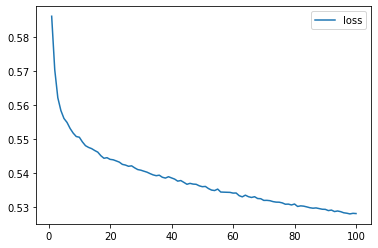

In [23]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))
history_df.plot(y="loss")

<AxesSubplot:>

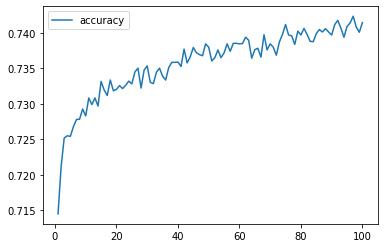

In [24]:
history_df.plot(y="accuracy")